In [4]:
import numpy as np
import pandas as pd
train = pd.read_csv("D:/ann jo/Msc assignment/internship/flight fare prediction/dataiku/TRAIN_DATASET.csv")
test = pd.read_csv("D:/ann jo/Msc assignment/internship/flight fare prediction/dataiku/Test_DATASET_1.csv")

In [18]:
train.head()

,Airline_IndiGo,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,...,Month,Year,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min,Stops,Price
0,1,0,0,0,0,0,0,0,0,0,...,3,2019,22,20,1,10,2,50,0,3897
1,0,1,0,0,0,0,0,0,0,0,...,5,2019,5,50,13,15,7,25,2,7662
2,0,0,1,0,0,0,0,0,0,0,...,6,2019,9,25,4,25,19,0,2,13882
3,1,0,0,0,0,0,0,0,0,0,...,5,2019,18,5,23,30,5,25,1,6218
4,1,0,0,0,0,0,0,0,0,0,...,3,2019,16,50,21,35,4,45,1,13302


In [5]:
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values

In [6]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [4]:
#tpot
tpot = TPOTRegressor(verbosity=2,random_state=25,generations=10, population_size=100,cv=5,scoring='r2')
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.7936157462935419

Generation 2 - Current best internal CV score: 0.8312078964908446

Generation 3 - Current best internal CV score: 0.8329787103215971

Generation 4 - Current best internal CV score: 0.8359282146747379

Generation 5 - Current best internal CV score: 0.8359282146747379

Generation 6 - Current best internal CV score: 0.8396294347884963

Generation 7 - Current best internal CV score: 0.8409451942605746

Generation 8 - Current best internal CV score: 0.8409451942605746

Generation 9 - Current best internal CV score: 0.8421393077143066

Generation 10 - Current best internal CV score: 0.8423255803146166

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=100)


TPOTRegressor(generations=10, random_state=25, scoring='r2', verbosity=2)

In [7]:
#tpot_flight_1.py

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split


# Average CV score on the training set was: 0.8423255803146166
exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 25)

exported_pipeline.fit(X_train,y_train)
results = exported_pipeline.predict(X_test)

In [9]:
exported_pipeline.score(X_test,y_test)

0.8419165260303476

D:\ann jo\anacondaa\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

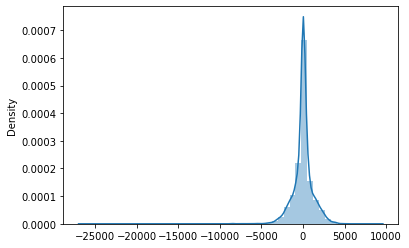

In [17]:
import seaborn as sb
sb.distplot(exported_pipeline.predict(X_train) - y_train)

In [10]:
from sklearn.metrics import r2_score
y_pred = exported_pipeline.predict(X_test)
r2_score(y_pred,y_test)

0.8179496820760773

In [8]:
tpot.export('tpot_flight_1.py')

In [11]:
# Create the submission file
final = pd.DataFrame({'Stops': test['Stops'], 'Price': y_pred})
final.to_csv('D:/ann jo/Msc assignment/internship/flight fare prediction/dataiku/submission.csv', index = False)

In [12]:
final.head(10)

,Stops,Price
0,1,10829.187627
1,1,10801.845139
2,1,11857.233421
3,1,4808.258333
4,0,12211.418163
5,1,10377.139611
6,1,10485.889873
7,1,23020.531369
8,0,5414.085163
9,1,12934.007052


# Pickle Approach

In [13]:
import pickle
filename="F_Model.pkl"
with open(filename,'wb') as file:
    pickle.dump(exported_pipeline,file)

In [14]:
#load
with open(filename,'rb') as file:
    pickled_tpot=pickle.load(file)

In [15]:
#calculate_score
score=pickled_tpot.score(X_test,y_test)
score

0.8419165260303476

In [16]:
y_predict=pickled_tpot.predict(X_test)
y_predict

array([10829.18762698, 10801.84513889, 11857.23342063, ...,
        8565.25161111, 11932.06119048, 11951.88661905])